<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Book-Recommender" data-toc-modified-id="Book-Recommender-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Book Recommender</a></span><ul class="toc-item"><li><span><a href="#Load-Libraries/Data" data-toc-modified-id="Load-Libraries/Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load Libraries/Data</a></span></li><li><span><a href="#Quick-Look-At-Data" data-toc-modified-id="Quick-Look-At-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Quick Look At Data</a></span><ul class="toc-item"><li><span><a href="#Reviews-Total" data-toc-modified-id="Reviews-Total-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Reviews Total</a></span></li><li><span><a href="#Reviews-per-book" data-toc-modified-id="Reviews-per-book-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Reviews per book</a></span></li><li><span><a href="#Reviews-per-user" data-toc-modified-id="Reviews-per-user-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Reviews per user</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Book-Recommender" data-toc-modified-id="Book-Recommender-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Book Recommender</a></span><ul class="toc-item"><li><span><a href="#Pivot-Table" data-toc-modified-id="Pivot-Table-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Pivot Table</a></span></li><li><span><a href="#Similarity-Matrix" data-toc-modified-id="Similarity-Matrix-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Similarity Matrix</a></span></li><li><span><a href="#Code-to-Save-Matrix-(pickle)" data-toc-modified-id="Code-to-Save-Matrix-(pickle)-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Code to Save Matrix (pickle)</a></span></li><li><span><a href="#Recommender-Function-Variations" data-toc-modified-id="Recommender-Function-Variations-1.4.4"><span class="toc-item-num">1.4.4&nbsp;&nbsp;</span>Recommender Function Variations</a></span></li></ul></li><li><span><a href="#Author-Recommendation" data-toc-modified-id="Author-Recommendation-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Author Recommendation</a></span><ul class="toc-item"><li><span><a href="#Data-Review" data-toc-modified-id="Data-Review-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Data Review</a></span></li><li><span><a href="#Pivot-Table" data-toc-modified-id="Pivot-Table-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Pivot Table</a></span></li><li><span><a href="#Similarity-Matrix" data-toc-modified-id="Similarity-Matrix-1.5.3"><span class="toc-item-num">1.5.3&nbsp;&nbsp;</span>Similarity Matrix</a></span></li><li><span><a href="#Code-to-Save-Data" data-toc-modified-id="Code-to-Save-Data-1.5.4"><span class="toc-item-num">1.5.4&nbsp;&nbsp;</span>Code to Save Data</a></span></li><li><span><a href="#Data-Aggregation" data-toc-modified-id="Data-Aggregation-1.5.5"><span class="toc-item-num">1.5.5&nbsp;&nbsp;</span>Data Aggregation</a></span></li><li><span><a href="#Recommendation-Function-Variations" data-toc-modified-id="Recommendation-Function-Variations-1.5.6"><span class="toc-item-num">1.5.6&nbsp;&nbsp;</span>Recommendation Function Variations</a></span></li></ul></li><li><span><a href="#Excess-Code" data-toc-modified-id="Excess-Code-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Excess Code</a></span></li></ul></li></ul></div>

# Book Recommender

## Load Libraries/Data

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
from datetime import datetime
import warnings
import time
from scipy import stats
import itertools

import pickle as pk
import gzip

In [7]:
ratings = pd.read_csv( 'ratings.csv' )
read = pd.read_csv( 'to_read.csv' )
books = pd.read_csv( 'books.csv' )
tags = pd.read_csv( 'tags.csv' )
booktags = pd.read_csv( 'book_tags.csv')

## Quick Look At Data

In [3]:
ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


### Reviews Total

In [4]:
len(ratings)

5976479

In [5]:
ratings['user_id'].nunique()

53424

There are 5,976,479 total ratings from the dataset from 53,424 unique Goodreads users

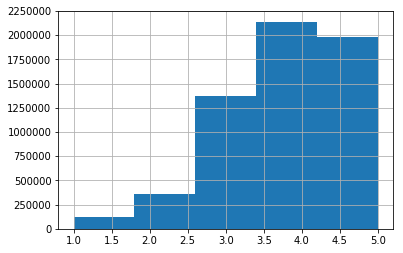

In [6]:
ratings.rating.hist(bins = 5)

Lots of high ratings - but this dataset represents popular books that are more known.

In [7]:
books.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [23]:
books.columns

Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url'],
      dtype='object')

In [8]:
len(books)

10000

There are 10,000 books from this review set.

### Reviews per book

In [9]:
reviews_per_book = ratings.groupby('book_id').book_id.apply(lambda x: len(x))
reviews_per_book.describe()

count    10000.000000
mean       597.647900
std       1267.289788
min          8.000000
25%        155.000000
50%        248.000000
75%        503.000000
max      22806.000000
Name: book_id, dtype: float64

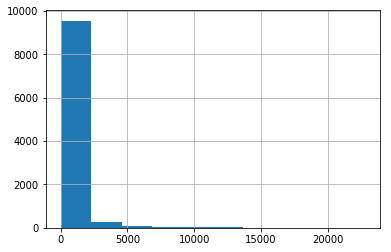

In [16]:
reviews_per_book.hist(bins = 10)

There is a wide range of reviews per book - the max is 22,806 reviews, while the minimum is only 8. Avg is about 597 votes, which is substantial for a recommender, but you can see from the histogram that majority of review counts are less than 2,500.

### Reviews per user

In [13]:
reviews_per_user = ratings.groupby('user_id').user_id.apply(lambda x: len(x))
reviews_per_user.describe()

count    53424.000000
mean       111.868804
std         26.071224
min         19.000000
25%         96.000000
50%        111.000000
75%        128.000000
max        200.000000
Name: user_id, dtype: float64

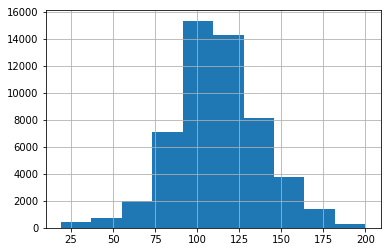

In [17]:
reviews_per_user.hist(bins = 10)

Again, there is a wide range of reviews per user - the max is 200 reviews (woah), while the minimum is only 19, which is substantial for an active user. Avg is about 111, and the distribution is more normal here.

## EDA

In [177]:
book_ref = books[['book_id','isbn13', 'authors', 'original_publication_year',
       'original_title', 'title','average_rating',
       'ratings_count','image_url', 'small_image_url']]

In [5]:
book_ref = book_ref.sort_values(['title'])
book_ref.head()

,book_id,isbn13,authors,original_publication_year,original_title,title,average_rating,ratings_count,image_url,small_image_url
3997,3998,9.780061e+12,Marian Keyes,2002.0,Angels,"Angels (Walsh Family, #3)",3.73,25680,https://images.gr-assets.com/books/1407711412m...,https://images.gr-assets.com/books/1407711412s...
9609,9610,9.789775e+12,حسن الجندي,2013.0,"""حكايات فرغلي المستكاوي ""حكايتى مع كفر السحلاوية","""حكايات فرغلي المستكاوي ""حكايتى مع كفر السحلاوية",3.57,7443,https://images.gr-assets.com/books/1360260051m...,https://images.gr-assets.com/books/1360260051s...
2854,2855,9.780399e+12,Sophia Amoruso,2014.0,NaN,#GIRLBOSS,3.71,40090,https://images.gr-assets.com/books/1390931472m...,https://images.gr-assets.com/books/1390931472s...
348,349,9.780450e+12,Stephen King,1975.0,Salem's Lot,'Salem's Lot,3.99,228680,https://images.gr-assets.com/books/1327891565m...,https://images.gr-assets.com/books/1327891565s...
1291,1292,9.780386e+12,"Stephen King, Jerry N. Uelsmann",2005.0,'Salem's Lot The Illustrated Edition,'Salem's Lot,4.25,72797,https://images.gr-assets.com/books/1320478491m...,https://images.gr-assets.com/books/1320478491s...


In [6]:
book_ref.to_csv('book_ref.csv', sep='\t')

In [8]:
pk.dump(book_ref, open('book_ref','wb'))

In [7]:
book_ref.sort_values(['average_rating'],ascending=False).head(10)

,book_id,isbn13,authors,original_publication_year,original_title,title,average_rating,ratings_count,image_url,small_image_url
3627,3628,9.780741e+12,Bill Watterson,2005.0,The Complete Calvin and Hobbes,The Complete Calvin and Hobbes,4.82,28900,https://images.gr-assets.com/books/1473064526m...,https://images.gr-assets.com/books/1473064526s...
3274,3275,9.780440e+12,"J.K. Rowling, Mary GrandPré",2003.0,NaN,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...",4.77,33220,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
861,862,9.780765e+12,Brandon Sanderson,2014.0,Words of Radiance,"Words of Radiance (The Stormlight Archive, #2)",4.77,73572,https://images.gr-assets.com/books/1391535251m...,https://images.gr-assets.com/books/1391535251s...
7946,7947,9.781434e+12,"Anonymous, Lane T. Dennis, Wayne A. Grudem",2002.0,NaN,ESV Study Bible,4.76,8953,https://images.gr-assets.com/books/1410151002m...,https://images.gr-assets.com/books/1410151002s...
8853,8854,9.780842e+12,Francine Rivers,1993.0,Mark of the Lion Trilogy,Mark of the Lion Trilogy,4.76,9081,https://images.gr-assets.com/books/1349032180m...,https://images.gr-assets.com/books/1349032180s...
4482,4483,9.780836e+12,Bill Watterson,1996.0,It's a Magical World: A Calvin and Hobbes Coll...,It's a Magical World: A Calvin and Hobbes Coll...,4.75,22351,https://images.gr-assets.com/books/1437420710m...,https://images.gr-assets.com/books/1437420710s...
421,422,9.780545e+12,J.K. Rowling,1998.0,Complete Harry Potter Boxed Set,"Harry Potter Boxset (Harry Potter, #1-7)",4.74,190050,https://images.gr-assets.com/books/1392579059m...,https://images.gr-assets.com/books/1392579059s...
6360,6361,9.780836e+12,Bill Watterson,1996.0,There's Treasure Everywhere: A Calvin and Hobb...,There's Treasure Everywhere: A Calvin and Hobb...,4.74,16766,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
6589,6590,9.780752e+12,Bill Watterson,1990.0,The Authoritative Calvin and Hobbes,The Authoritative Calvin and Hobbes: A Calvin ...,4.73,16087,https://images.gr-assets.com/books/1391114055m...,https://images.gr-assets.com/books/1391114055s...
3752,3753,9.780440e+12,J.K. Rowling,2005.0,"Harry Potter Collection (Harry Potter, #1-6)","Harry Potter Collection (Harry Potter, #1-6)",4.73,24618,https://images.gr-assets.com/books/1328867351m...,https://images.gr-assets.com/books/1328867351s...


## Book Recommender

### Pivot Table

Pivot the table to make a ratings matrix used for cosine similarity. The table will be: rows - all unique books, columns - all unique users. The cells will contain matching review score. Resulting table will be sparse, as not ever user has rated every book

In [19]:
ratings_matrix = ratings.pivot_table(index=['book_id'],columns=['user_id'],values='rating').reset_index(drop=True)
ratings_matrix.fillna(0, inplace = True )
ratings_matrix.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,53415,53416,53417,53418,53419,53420,53421,53422,53423,53424
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0
1,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,5.0,5.0,5.0,5.0,5.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,4.0
3,5.0,0.0,3.0,4.0,0.0,0.0,0.0,3.0,0.0,5.0,...,0.0,0.0,0.0,0.0,3.0,0.0,5.0,0.0,5.0,5.0
4,0.0,5.0,0.0,4.0,0.0,0.0,3.0,3.0,5.0,5.0,...,0.0,0.0,0.0,0.0,3.0,2.0,4.0,0.0,0.0,0.0


Cosine similarity from pairwise distances will turn ratings matrix into a table of similarity scores; a 10,000x10,000 matrix that represents the item-to-item collaborative filtering

### Similarity Matrix

In [20]:
from sklearn.metrics import pairwise_distances

#cosine distance = 1-(cosine similarity)
similarity = 1 - pairwise_distances( ratings_matrix.as_matrix(), metric="cosine" )
np.fill_diagonal(similarity, 0) #Filling diagonals with 0s for future use when sorting is done
ratings_matrix = pd.DataFrame(similarity)
ratings_matrix.head(5)

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0.000000,0.589840,0.561142,0.448696,0.396913,0.426246,0.400916,0.338818,0.401081,0.369558,...,0.017498,0.017972,0.019893,0.046258,0.021739,0.023686,0.009895,0.017746,0.034738,0.013949
1,0.589840,0.000000,0.523809,0.493046,0.441769,0.322296,0.525491,0.399516,0.440514,0.429215,...,0.020618,0.018916,0.019696,0.041959,0.025115,0.022102,0.010512,0.022980,0.025999,0.016153
2,0.561142,0.523809,0.000000,0.362559,0.309284,0.313530,0.310542,0.265028,0.364219,0.364369,...,0.010293,0.009201,0.008138,0.034482,0.011529,0.029365,0.008328,0.004318,0.017060,0.002602
3,0.448696,0.493046,0.362559,0.000000,0.587586,0.282096,0.425565,0.551808,0.370716,0.479950,...,0.038342,0.010529,0.024342,0.025542,0.038902,0.010172,0.022494,0.019006,0.032705,0.025103
4,0.396913,0.441769,0.309284,0.587586,0.000000,0.257952,0.396766,0.577414,0.331094,0.466008,...,0.040399,0.007803,0.020729,0.017585,0.044162,0.004830,0.028338,0.020741,0.025513,0.029433


### Code to Save Matrix (pickle)

In [22]:
import pickle as pk

pk.dump(ratings_matrix, open('br_cosine','wb'))

In [3]:
ratings_matrix = pk.load(open("br_cosine","rb"))

In [ ]:
ratings_matrix.to_csv('cosine_matrix.csv')

### Recommender Function Variations

In [3]:
def recommend(user_input):
    # Use string contains to isolate the input from the user to identify the book they want to find similarities to
    if books['title'].str.contains(user_input).any():
        #inp=books[books['title']==user_input].index.tolist()
        inp = books[books['title'].str.contains(user_input)].index.tolist()
        # Look at the first one in this list; duplicate locations not needed
        inp=inp[0]
    
        ans = books
        # Add similarity scores that correspond to user input
        ans['similarity'] = ratings_matrix.iloc[inp]
        ans2 = ans.sort_values(['similarity'], ascending = False )
        ans2 = ans2[['title','authors','original_publication_year','similarity']][0:5]
    
        print("Recommended books based on your choice of",user_input ,": \n", ans2)
    
    else:
        print("Sorry, that book is not in the database!")

In [26]:
recommend('Harry Potter and the Chamber of Secrets')

Recommended books based on your choice of Harry Potter and the Chamber of Secrets : 
                                                 title  \
17  Harry Potter and the Prisoner of Azkaban (Harr...   
23  Harry Potter and the Goblet of Fire (Harry Pot...   
26  Harry Potter and the Half-Blood Prince (Harry ...   
20  Harry Potter and the Order of the Phoenix (Har...   
24  Harry Potter and the Deathly Hallows (Harry Po...   

                                    authors  original_publication_year  \
17  J.K. Rowling, Mary GrandPré, Rufus Beck                     1999.0   
23              J.K. Rowling, Mary GrandPré                     2000.0   
26              J.K. Rowling, Mary GrandPré                     2005.0   
20              J.K. Rowling, Mary GrandPré                     2003.0   
24              J.K. Rowling, Mary GrandPré                     2007.0   

    similarity  
17    0.906029  
23    0.884444  
26    0.863506  
20    0.862174  
24    0.833528  


In [79]:
def recommend2(user_input,same_author,same_series):
    
    if books['title'].str.contains(user_input).any():
        
        # Similar approach as above function
        inp = books[books['title'].str.contains(user_input)].index.tolist()
        inp=inp[0]
    
        ans = books
        ans['similarity'] = ratings_matrix.iloc[inp]
        ans2 = ans.sort_values(['similarity'], ascending = False )
        
        # Implement options: look in user input says to include same author or not - to be translated for app
        if same_author == True:
            ans2 = ans2[['title','authors','original_publication_year','average_rating','similarity']][0:5]
            
        else:
            auth = books['authors'][inp]
            auth = auth.split(',',2)[0]
            ans2 = ans2[ans2['authors'].str.contains(auth)==False]
            ans2 = ans2[['title','authors','original_publication_year','average_rating','similarity']][0:5]
    
        print("Recommended books based on your choice of",books['title'][inp],'by',books['authors'][inp],": \n")
        return ans2
    
    else:
        print("Sorry, that book is not in the database!")

In [83]:
recommend2('Game of Thrones',0,1)

Recommended books based on your choice of A Game of Thrones (A Song of Ice and Fire, #1) by George R.R. Martin : 



,title,authors,original_publication_year,average_rating,similarity
18,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,1954.0,4.34,0.413352
6,The Hobbit,J.R.R. Tolkien,1937.0,4.25,0.403572
1,Harry Potter and the Sorcerer's Stone (Harry P...,"J.K. Rowling, Mary GrandPré",1997.0,4.44,0.393610
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,2008.0,4.34,0.387006
191,The Name of the Wind (The Kingkiller Chronicle...,Patrick Rothfuss,2007.0,4.55,0.335431


In [181]:
def reco(book_input,same_author):
    
    # Similar function, but returns a dataframe for ease of view
    
    inp = books[books['title']==(book_input)].index.tolist()
    inp=inp[0]
  
    ans = books
    ans['similarity'] = ratings_matrix.iloc[inp]
    ans2 = ans.sort_values(['similarity'], ascending = False )
  
    if same_author == 0:
        auth = books['authors'][inp]
        auth = auth.split(',',2)[0]
        ans2 = ans2[ans2['authors'].str.contains(auth)==False]
        ans2 = ans2[['title','authors','original_publication_year','average_rating','similarity']][0:5]
        #print("Recommended books based on your choice of",books['title'][inp],'by',books['authors'][inp],": \n")
    else:
        ans2 = ans2[['title','authors','original_publication_year','average_rating','similarity']][0:5]

    #reco = generate_table(ans2)

    return ans2

In [186]:
x = reco('Divergent (Divergent, #1)',0)
x

,title,authors,original_publication_year,average_rating,similarity
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,2008.0,4.34,0.523317
16,"Catching Fire (The Hunger Games, #2)",Suzanne Collins,2009.0,4.30,0.483373
5,The Fault in Our Stars,John Green,2012.0,4.26,0.478684
19,"Mockingjay (The Hunger Games, #3)",Suzanne Collins,2010.0,4.03,0.475523
50,"City of Bones (The Mortal Instruments, #1)",Cassandra Clare,2007.0,4.12,0.441179


In [83]:
def book_choice_text(book_input):
    
    # Isolate specific data, print out description. For use in app
    
    inp = books[books['title']==(book_input)].index.tolist()
    inp = inp[0]
    choice_title = books['title'][int(str(inp).strip('[]'))]
    choice_author = books['authors'][int(str(inp).strip('[]'))]
    choice_date = books['original_publication_year'][int(str(inp).strip('[]'))]
    choice_rating = books['average_rating'][int(str(inp).strip('[]'))]
    
    return print('{0}\n  by {1}\n  Published: {2}\n  Avg. Goodreads Rating: {3}'.format(choice_title, choice_author,choice_date,choice_rating))

In [84]:
book_choice_text('1984')

1984
  by George Orwell, Erich Fromm, Celâl Üster
  Published: 1949.0
  Avg. Goodreads Rating: 4.14


## Author Recommendation

### Data Review

In [187]:
ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [203]:
author_ref = books2[['book_id','author_id']]
author_ref.head()

,book_id,author_id
0,1,4222
1,2,1869
2,3,4153
3,4,1652
4,5,1351


In [4]:
books2 = books
#books2 = books.drop(['similarity'], axis=1)
books2.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [73]:
# Create author IDs using .cat.codes for unique authors

books2['authors'] = books2['authors'].astype('category')
books2['author_id'] = books2['authors'].cat.codes
books2 = books2.sort_values(['title'])
books2

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,author_id
3997,3998,82747,82747,3241063,67,60512148,9.780061e+12,Marian Keyes,2002.0,Angels,...,27576,680,573,2029,8418,9755,6801,https://images.gr-assets.com/books/1407711412m...,https://images.gr-assets.com/books/1407711412s...,2954
9609,9610,17339590,17339590,24074646,4,NaN,9.789775e+12,حسن الجندي,2013.0,"""حكايات فرغلي المستكاوي ""حكايتى مع كفر السحلاوية",...,8288,1220,532,970,2188,2404,2194,https://images.gr-assets.com/books/1360260051m...,https://images.gr-assets.com/books/1360260051s...,4637
2854,2855,18667945,18667945,26493608,35,039916927X,9.780399e+12,Sophia Amoruso,2014.0,NaN,...,43741,2980,2080,4220,11094,13126,13221,https://images.gr-assets.com/books/1390931472m...,https://images.gr-assets.com/books/1390931472s...,4085
348,349,11590,11590,3048937,211,450031063,9.780450e+12,Stephen King,1975.0,Salem's Lot,...,246360,6167,2713,11724,57171,89196,85556,https://images.gr-assets.com/books/1327891565m...,https://images.gr-assets.com/books/1327891565s...,4128
1291,1292,5413,5413,40802405,22,385516487,9.780386e+12,"Stephen King, Jerry N. Uelsmann",2005.0,'Salem's Lot The Illustrated Edition,...,74725,482,460,1854,12040,24920,35451,https://images.gr-assets.com/books/1320478491m...,https://images.gr-assets.com/books/1320478491s...,4136
2251,2252,4912,4912,1779262,85,6551815,9.780007e+12,Frank McCourt,1999.0,'Tis: A Memoir,...,46748,1919,652,3689,15825,17256,9326,https://images.gr-assets.com/books/1375947803m...,https://images.gr-assets.com/books/1375947803s...,1391
2617,2618,11525,11525,141,28,761104844,9.780761e+12,Patricia Schultz,2003.0,"1,000 Places to See Before You Die",...,33805,450,902,2333,8984,10877,10709,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,3462
4675,4676,3692091,3692091,3735566,5,NaN,9.789772e+12,Essam Youssef,2008.0,1/4 جرام,...,16725,1895,723,1012,2763,4996,7231,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,1335
2751,2752,18505796,18505796,26365939,29,62265423,9.780062e+12,Dan Harris,2014.0,"10% Happier: How I Tamed the Voice in My Head,...",...,39748,3485,1106,2034,7948,15912,12748,https://images.gr-assets.com/books/1451446393m...,https://images.gr-assets.com/books/1451446393s...,900
8096,8097,94510,94510,2647240,13,1563896451,9.781564e+12,"Brian Azzarello, Eduardo Risso",1999.0,"100 Bullets, Vol. 1: First Shot, Last Call (10...",...,13117,359,298,985,3368,4614,3852,https://images.gr-assets.com/books/1327888942m...,https://images.gr-assets.com/books/1327888942s...,547


In [204]:
ratings3 = ratings
ratings3.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [227]:
pk.dump(auth, open('author_ref','wb'))

In [207]:
# Merge the author IDs with original ratings DF
f = pd.merge(author_ref,ratings3,on='book_id')

In [209]:
f.head()

,book_id,author_id,user_id,rating
0,1,4222,2886,5
1,1,4222,6158,5
2,1,4222,3991,4
3,1,4222,5281,5
4,1,4222,5721,5


### Pivot Table

Same process as section 1.4

In [211]:
ratings_matrix2 = f.pivot_table(index=['author_id'],columns=['user_id'],values='rating').reset_index(drop=True)
ratings_matrix2.fillna(0, inplace = True )
ratings_matrix2.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,53415,53416,53417,53418,53419,53420,53421,53422,53423,53424
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Similarity Matrix

In [213]:
from sklearn.metrics import pairwise_distances

#cosine distance = 1-(cosine similarity)
similarity2 = 1 - pairwise_distances( ratings_matrix2.as_matrix(), metric="cosine" )
np.fill_diagonal(similarity2, 0) #Filling diagonals with 0s for future use when sorting is done
ratings_matrix2 = pd.DataFrame(similarity2)
ratings_matrix2.head(5)

,0,1,2,3,4,5,6,7,8,9,...,4654,4655,4656,4657,4658,4659,4660,4661,4662,4663
0,0.000000,0.000000,0.013257,0.000000,0.000000,0.001175,0.008491,0.009265,0.004511,0.006695,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
1,0.000000,0.000000,0.001913,0.005887,0.011864,0.004018,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.001567,0.000000
2,0.013257,0.001913,0.000000,0.007668,0.011525,0.009426,0.004340,0.039972,0.115866,0.004978,...,0.0,0.000726,0.0,0.0,0.001759,0.0,0.000000,0.0,0.002730,0.002349
3,0.000000,0.005887,0.007668,0.000000,0.101863,0.004347,0.004157,0.004998,0.000000,0.000000,...,0.0,0.002618,0.0,0.0,0.000000,0.0,0.008941,0.0,0.000000,0.000000
4,0.000000,0.011864,0.011525,0.101863,0.000000,0.013298,0.003242,0.001927,0.001441,0.006366,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000


### Code to Save Data

In [214]:
pk.dump(ratings_matrix2, open('author_cosine','wb'))

In [3]:
ratings_matrix2 = pk.load(open("author_cosine","rb"))

In [74]:
pk.dump(books2, open('book_ref2','wb'))

### Data Aggregation

Looking for different ways to express data in the app - how many books the author has published, his/her average rating

In [121]:
auth = books2.groupby(['authors','author_id']).agg(['mean','count'])
auth = auth[['average_rating']].reset_index()
auth.head()

authors author_id average_rating      
                                                     mean count
0               A. Manette Ansay         0       3.360000     1
1            A. Meredith Walters         1       3.945000     2
2  A.A. Milne, Ernest H. Shepard         2       4.386667     6
3                   A.C. Gaughen         3       3.950000     1
4                    A.G. Howard         4       4.105000     2

In [170]:
auth['main_author'] = auth['authors'].str.split(',',1,expand=True)[0]
auth.head()

authors author_id average_rating        \
                                                     mean count   
0               A. Manette Ansay         0       3.360000     1   
1            A. Meredith Walters         1       3.945000     2   
2  A.A. Milne, Ernest H. Shepard         2       4.386667     6   
3                   A.C. Gaughen         3       3.950000     1   
4                    A.G. Howard         4       4.105000     2   

           main_author  
                        
0     A. Manette Ansay  
1  A. Meredith Walters  
2           A.A. Milne  
3         A.C. Gaughen  
4          A.G. Howard

In [42]:
sel = books2[books2['authors'].str.contains('George R.R. Martin')].sort_values('average_rating',ascending=False).iloc[[0]]
sel.index[0]

5343

### Recommendation Function Variations

In [90]:
def auth_recommend2(user_input):
    
    # Same process as book recommendations, but identifying author user input instead
    
    if auth['authors'].str.contains(user_input).any():
        
        inp = auth[auth['authors'].str.contains(user_input)].index.tolist()
        inp=inp[0]
    
        ans = auth
        ans['similarity'] = ratings_matrix2.iloc[inp]
        ans2 = ans.sort_values(['similarity'], ascending = False )
        
        if ans2['authors'].str.contains(user_input).any():
            ans2 = ans2[(~ans2['authors'].str.contains(user_input))]
        
        ans2 = ans2[['authors','average_rating','similarity']][0:5]
    
        print("Recommended authors based on your choice of",auth['authors'][inp],": \n")
        return ans2
    
    else:
        print("Sorry, that book is not in the database!")

In [91]:
y = auth_recommend2('Brandon Sanderson')
y

Recommended authors based on your choice of Brandon Sanderson : 



authors average_rating       similarity
                                 mean count           
3468  Patrick Rothfuss       4.560000     2   0.478326
3783     Robert Jordan       4.125333    15   0.444133
541        Brent Weeks       4.305556     9   0.428375
3990       Scott Lynch       4.253333     3   0.405404
3827        Robin Hobb       4.087368    19   0.395915

## Excess Code

Mostly uncommented. These are just examining new ways of displaying data for the app; reducing size of the DFs by changing the data types from float64 to float16 and using gzip.

In [139]:
w = pk.load(open("authors","rb"))

In [169]:
ww = w[['authors','author_id','main_author']]
ww.columns = ['authors','author_id','main_author']
ww.head()

,authors,author_id,main_author
0,A. Manette Ansay,0,A. Manette Ansay
1,A. Meredith Walters,1,A. Meredith Walters
2,"A.A. Milne, Ernest H. Shepard",2,A.A. Milne
3,A.C. Gaughen,3,A.C. Gaughen
4,A.G. Howard,4,A.G. Howard


In [168]:
z = books2[['author_id','original_publication_year']]
z.drop_duplicates('author_id').head()

,author_id,original_publication_year
3997,2954,2002.0
9609,4637,2013.0
2854,4085,2014.0
348,4128,1975.0
1291,4136,2005.0


In [167]:
zz = pd.merge(ww,z,on='author_id')
zz=zz.drop_duplicates('author_id').reset_index()
zz.head()

,index,authors,author_id,main_author,original_publication_year
0,0,A. Manette Ansay,0,A. Manette Ansay,1994.0
1,1,A. Meredith Walters,1,A. Meredith Walters,2012.0
2,3,"A.A. Milne, Ernest H. Shepard",2,A.A. Milne,1927.0
3,9,A.C. Gaughen,3,A.C. Gaughen,2012.0
4,10,A.G. Howard,4,A.G. Howard,2013.0


In [161]:
pk.dump(zz, open('authors2','wb'))

In [175]:
from random import randint

randint(0,10000)

1329

In [180]:
date_range = [1,5];
t_dict = {0:-800,1:1800,2:1900,3:1950,4:1975,5:2000,6:2010,7:2018}
t = [t_dict[date_range[0]],t_dict[date_range[1]]]
t

[1800, 2000]

In [181]:
zz[zz.original_publication_year.between(t[0], t[1], inclusive=True)]

,index,authors,author_id,main_author,original_publication_year
0,0,A. Manette Ansay,0,A. Manette Ansay,1994.0
2,3,"A.A. Milne, Ernest H. Shepard",2,A.A. Milne,1927.0
8,20,"A.L. Singer, Walt Disney Company",8,A.L. Singer,1974.0
10,22,"A.N. Roquelaure, Anne Rice",10,A.N. Roquelaure,1984.0
11,26,"A.P.J. Abdul Kalam, Arun Tiwari",11,A.P.J. Abdul Kalam,1999.0
12,27,A.S. Byatt,12,A.S. Byatt,1990.0
15,32,A.W. Tozer,15,A.W. Tozer,1961.0
20,59,Adam Gopnik,20,Adam Gopnik,2000.0
21,60,Adam Hochschild,21,Adam Hochschild,1998.0
28,67,"Adele Faber, Elaine Mazlish, Kimberly Ann Coe",28,Adele Faber,1979.0


In [5]:
pk.dump(ratings_matrix, open('111','wb'))

In [ ]:
ratings_matrix.to_json(orient='index')

In [ ]:
book_sim = gzip.open('books_cosine','wb')
pk.dump(ratings_matrix,book_sim)
book_sim.close()

In [7]:
f = gzip.open('br_cosine2','rb')
myNewObject = pk.load(f)
f.close()

In [8]:
myNewObject

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0.000000,0.589840,0.561142,0.448696,0.396913,0.426246,0.400916,0.338818,0.401081,0.369558,...,0.017498,0.017972,0.019893,0.046258,0.021739,0.023686,0.009895,0.017746,0.034738,0.013949
1,0.589840,0.000000,0.523809,0.493046,0.441769,0.322296,0.525491,0.399516,0.440514,0.429215,...,0.020618,0.018916,0.019696,0.041959,0.025115,0.022102,0.010512,0.022980,0.025999,0.016153
2,0.561142,0.523809,0.000000,0.362559,0.309284,0.313530,0.310542,0.265028,0.364219,0.364369,...,0.010293,0.009201,0.008138,0.034482,0.011529,0.029365,0.008328,0.004318,0.017060,0.002602
3,0.448696,0.493046,0.362559,0.000000,0.587586,0.282096,0.425565,0.551808,0.370716,0.479950,...,0.038342,0.010529,0.024342,0.025542,0.038902,0.010172,0.022494,0.019006,0.032705,0.025103
4,0.396913,0.441769,0.309284,0.587586,0.000000,0.257952,0.396766,0.577414,0.331094,0.466008,...,0.040399,0.007803,0.020729,0.017585,0.044162,0.004830,0.028338,0.020741,0.025513,0.029433
5,0.426246,0.322296,0.313530,0.282096,0.257952,0.000000,0.170626,0.205245,0.187138,0.221719,...,0.010348,0.001618,0.010204,0.029168,0.013830,0.005803,0.004595,0.004220,0.027064,0.005820
6,0.400916,0.525491,0.310542,0.425565,0.396766,0.170626,0.000000,0.394625,0.338549,0.372836,...,0.027935,0.031301,0.032459,0.029757,0.029899,0.014056,0.017376,0.039016,0.017203,0.028317
7,0.338818,0.399516,0.265028,0.551808,0.577414,0.205245,0.394625,0.000000,0.309951,0.389588,...,0.043557,0.008383,0.025391,0.012553,0.038535,0.002456,0.019693,0.019412,0.028998,0.029317
8,0.401081,0.440514,0.364219,0.370716,0.331094,0.187138,0.338549,0.309951,0.000000,0.303735,...,0.015303,0.016581,0.014974,0.005684,0.018348,0.009599,0.015609,0.016692,0.013717,0.016419
9,0.369558,0.429215,0.364369,0.479950,0.466008,0.221719,0.372836,0.389588,0.303735,0.000000,...,0.031779,0.003460,0.021111,0.018104,0.029938,0.019453,0.018978,0.018570,0.023723,0.011875


In [3]:
ratings_matrix.shape

(10000, 10000)

In [4]:
r = round(ratings_matrix,3)

In [5]:
r.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0.000,0.590,0.561,0.449,0.397,0.426,0.401,0.339,0.401,0.370,...,0.017,0.018,0.020,0.046,0.022,0.024,0.010,0.018,0.035,0.014
1,0.590,0.000,0.524,0.493,0.442,0.322,0.525,0.400,0.441,0.429,...,0.021,0.019,0.020,0.042,0.025,0.022,0.011,0.023,0.026,0.016
2,0.561,0.524,0.000,0.363,0.309,0.314,0.311,0.265,0.364,0.364,...,0.010,0.009,0.008,0.034,0.012,0.029,0.008,0.004,0.017,0.003
3,0.449,0.493,0.363,0.000,0.588,0.282,0.426,0.552,0.371,0.480,...,0.038,0.011,0.024,0.026,0.039,0.010,0.022,0.019,0.033,0.025
4,0.397,0.442,0.309,0.588,0.000,0.258,0.397,0.577,0.331,0.466,...,0.040,0.008,0.021,0.018,0.044,0.005,0.028,0.021,0.026,0.029


In [3]:
ratings_matrix.dtypes

0       float64
1       float64
2       float64
3       float64
4       float64
5       float64
6       float64
7       float64
8       float64
9       float64
10      float64
11      float64
12      float64
13      float64
14      float64
15      float64
16      float64
17      float64
18      float64
19      float64
20      float64
21      float64
22      float64
23      float64
24      float64
25      float64
26      float64
27      float64
28      float64
29      float64
         ...   
9970    float64
9971    float64
9972    float64
9973    float64
9974    float64
9975    float64
9976    float64
9977    float64
9978    float64
9979    float64
9980    float64
9981    float64
9982    float64
9983    float64
9984    float64
9985    float64
9986    float64
9987    float64
9988    float64
9989    float64
9990    float64
9991    float64
9992    float64
9993    float64
9994    float64
9995    float64
9996    float64
9997    float64
9998    float64
9999    float64
Length: 10000, dtype: ob

In [4]:
test2 = ratings_matrix.astype('float16')

In [5]:
book_sim = gzip.open('books_cosine2','wb')
pk.dump(test2,book_sim)
book_sim.close()

In [6]:
test2.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0.000000,0.589844,0.561035,0.448730,0.396973,0.426270,0.400879,0.338867,0.401123,0.369629,...,0.017502,0.017975,0.019897,0.046265,0.021744,0.023682,0.009895,0.017746,0.034729,0.013947
1,0.589844,0.000000,0.523926,0.493164,0.441650,0.322266,0.525391,0.399414,0.440430,0.429199,...,0.020615,0.018921,0.019699,0.041962,0.025116,0.022095,0.010513,0.022980,0.026001,0.016159
2,0.561035,0.523926,0.000000,0.362549,0.309326,0.313477,0.310547,0.265137,0.364258,0.364258,...,0.010292,0.009201,0.008141,0.034485,0.011528,0.029358,0.008331,0.004318,0.017059,0.002602
3,0.448730,0.493164,0.362549,0.000000,0.587402,0.281982,0.425537,0.551758,0.370605,0.479980,...,0.038330,0.010529,0.024338,0.025543,0.038910,0.010170,0.022491,0.019012,0.032715,0.025101
4,0.396973,0.441650,0.309326,0.587402,0.000000,0.258057,0.396729,0.577637,0.331055,0.466064,...,0.040405,0.007805,0.020721,0.017578,0.044159,0.004829,0.028336,0.020737,0.025513,0.029434


In [19]:
q = pk.load(open("book_ref2","rb"))
q.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,author_id
3997,3998,82747,82747,3241063,67,60512148,9.780061e+12,Marian Keyes,2002.0,Angels,...,27576,680,573,2029,8418,9755,6801,https://images.gr-assets.com/books/1407711412m...,https://images.gr-assets.com/books/1407711412s...,2954
9609,9610,17339590,17339590,24074646,4,NaN,9.789775e+12,حسن الجندي,2013.0,"""حكايات فرغلي المستكاوي ""حكايتى مع كفر السحلاوية",...,8288,1220,532,970,2188,2404,2194,https://images.gr-assets.com/books/1360260051m...,https://images.gr-assets.com/books/1360260051s...,4637
2854,2855,18667945,18667945,26493608,35,039916927X,9.780399e+12,Sophia Amoruso,2014.0,NaN,...,43741,2980,2080,4220,11094,13126,13221,https://images.gr-assets.com/books/1390931472m...,https://images.gr-assets.com/books/1390931472s...,4085
348,349,11590,11590,3048937,211,450031063,9.780450e+12,Stephen King,1975.0,Salem's Lot,...,246360,6167,2713,11724,57171,89196,85556,https://images.gr-assets.com/books/1327891565m...,https://images.gr-assets.com/books/1327891565s...,4128
1291,1292,5413,5413,40802405,22,385516487,9.780386e+12,"Stephen King, Jerry N. Uelsmann",2005.0,'Salem's Lot The Illustrated Edition,...,74725,482,460,1854,12040,24920,35451,https://images.gr-assets.com/books/1320478491m...,https://images.gr-assets.com/books/1320478491s...,4136
